# Data Visualization: criação de gráficos com o Matplotlib
## Módulo 1
### Fazendo as primeiras visualizações

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import datetime
%matplotlib inline

In [2]:
df = pd.read_csv('monitoramento_tempo.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperatura          45253 non-null  float64
 1   pressão              45253 non-null  float64
 2   humidade             45253 non-null  float64
 3   direção do vento     45253 non-null  float64
 4   velocidade do vento  45253 non-null  float64
 5   dia_da_semana        45253 non-null  object 
 6   data                 45253 non-null  object 
dtypes: float64(5), object(2)
memory usage: 2.4+ MB


In [3]:
# Convertendo a coluna de data para datetime
df['data'] = pd.to_datetime(df['data'])

Text(0.5, 1.0, 'Temperatura X tempo')

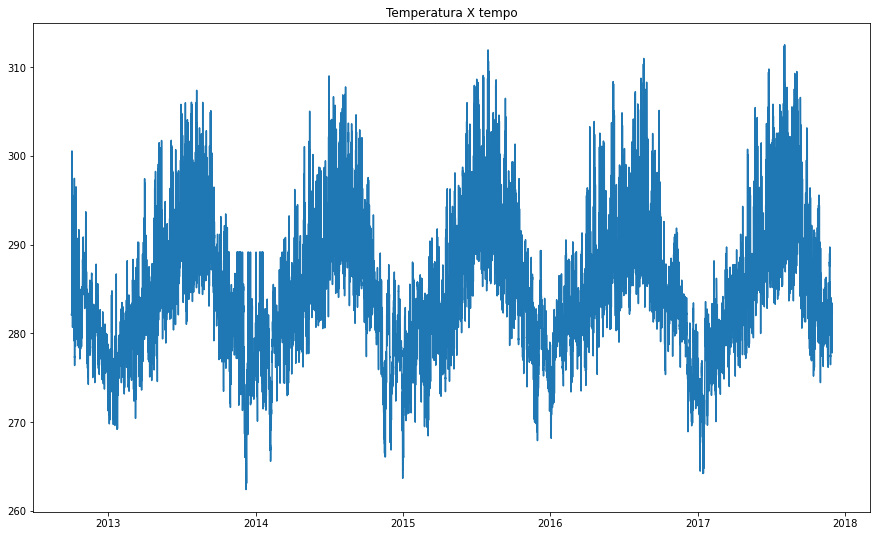

In [4]:
plt.figure(figsize=(15,9))
plt.plot(df['data'], df['temperatura'])
plt.title('Temperatura X tempo')

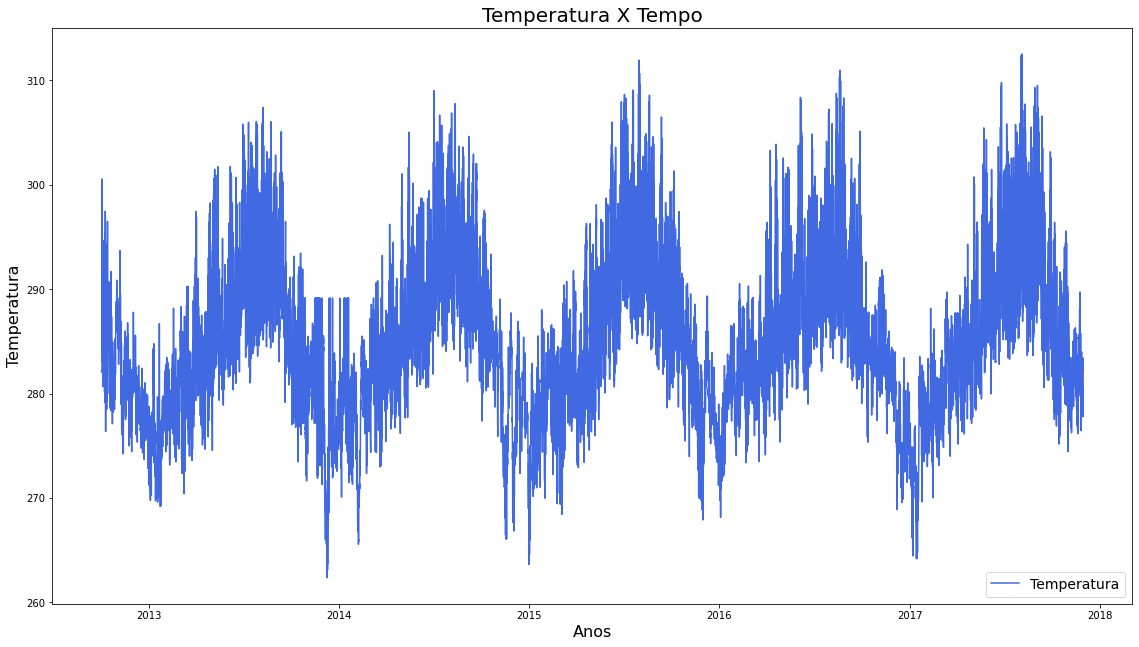

In [5]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])
eixo.plot(df['data'], df['temperatura'], color = 'royalblue')
eixo.set_title('Temperatura X Tempo', fontsize = 20)
eixo.set_ylabel('Temperatura', fontsize = 16)
eixo.set_xlabel('Anos', fontsize = 16)
eixo.legend(['Temperatura'], loc = 'lower right', fontsize = 14)

## Módulo 2
### Customizando nossas visualizações

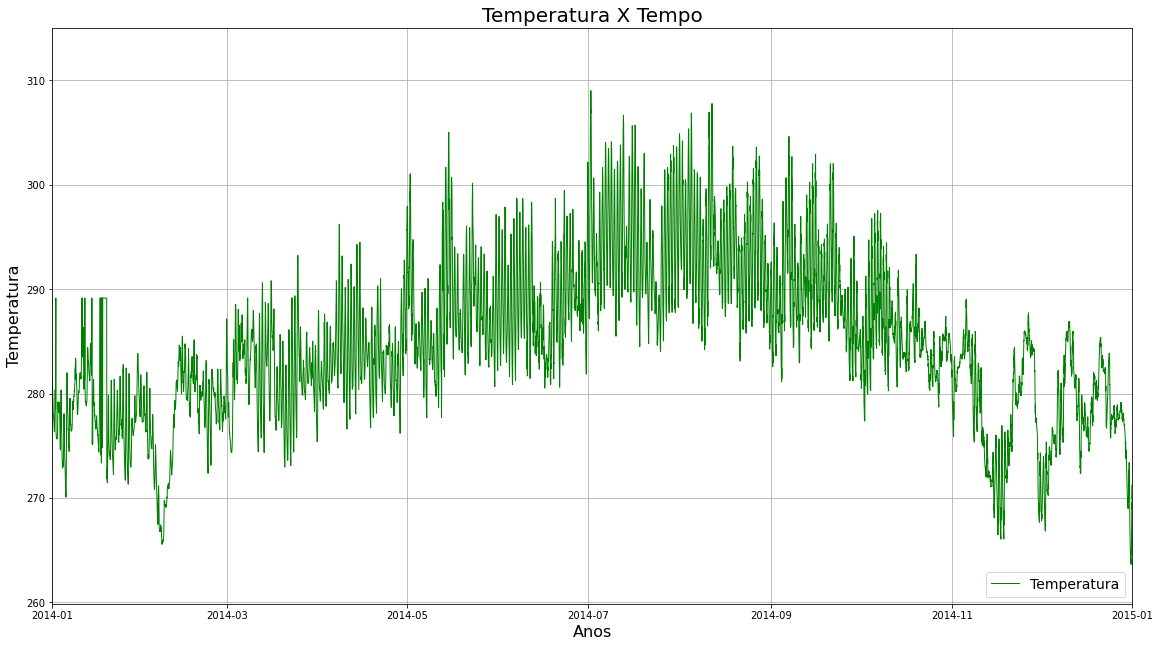

In [6]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])
eixo.plot(df['data'], df['temperatura'], color = 'green', lw = 1)

eixo.set_xlim(datetime.datetime(2014,1,1), datetime.datetime(2015,1,1))
eixo.set_title('Temperatura X Tempo', fontsize = 20)
eixo.set_ylabel('Temperatura', fontsize = 16)
eixo.set_xlabel('Anos', fontsize = 16)
eixo.legend(['Temperatura'], loc = 'lower right', fontsize = 14)
eixo.grid(True)

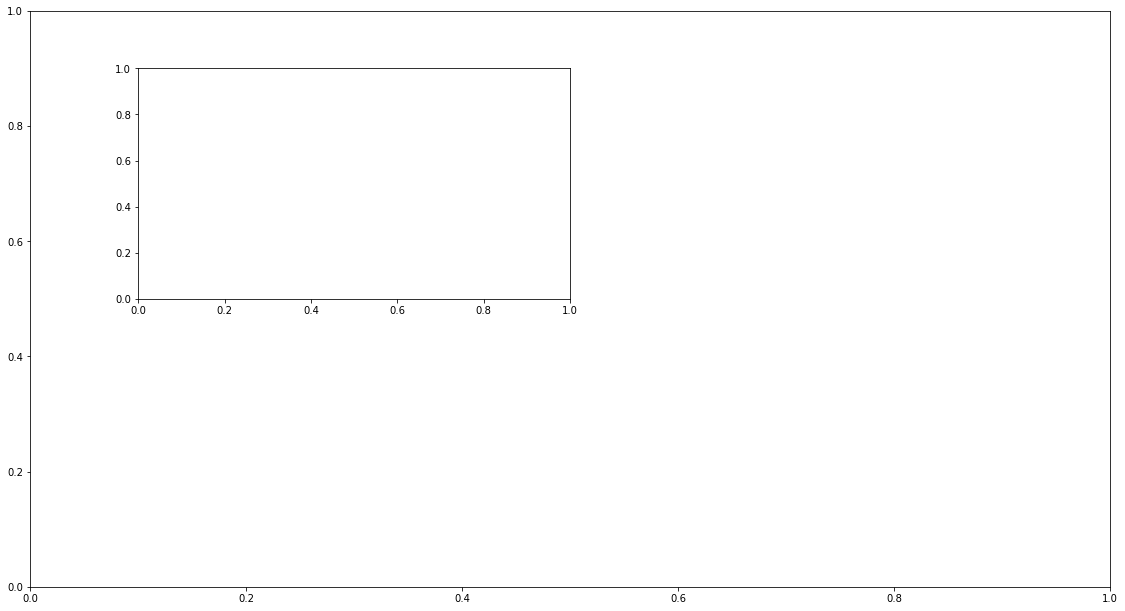

In [7]:
# Criando uma visualização dentro de um gráfico
fig = plt.figure(figsize=(15,8))

eixo = fig.add_axes([0,0,1,1])
eixo2 = fig.add_axes([0.1, 0.5, 0.4, 0.4])

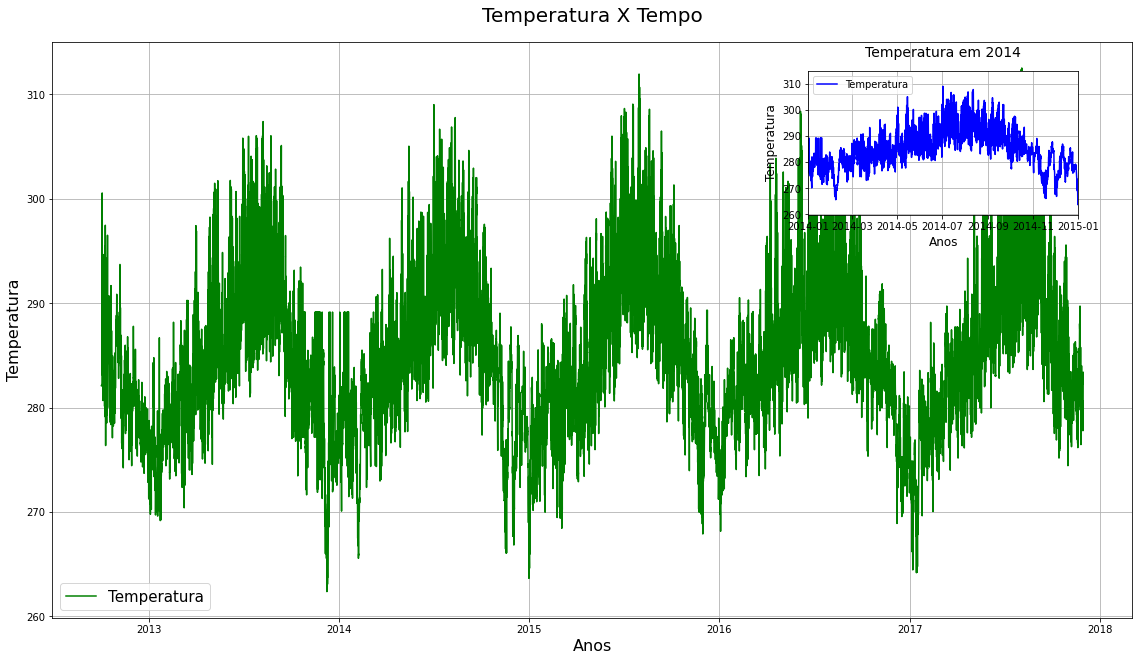

In [8]:
fig = plt.figure(figsize=(15,8))

eixo = fig.add_axes([0,0,1,1])
eixo2 = fig.add_axes([0.7, 0.7, 0.25, 0.25])

eixo.plot(df['data'], df['temperatura'], color = 'g')
eixo.legend(['Temperatura'], loc = 'lower left', fontsize = 15)
eixo.grid(True)
eixo.set_ylabel('Temperatura', fontsize = 16)
eixo.set_xlabel('Anos', fontsize = 16)
eixo.set_title('Temperatura X Tempo', fontsize = 20, pad = 20)

eixo2.plot(df['data'], df['temperatura'], color = 'b')
eixo2.legend(['Temperatura'], loc = 'upper left', fontsize = 10)
eixo2.set_xlabel('Anos', fontsize = 12)
eixo2.set_ylabel('Temperatura', fontsize = 12)
eixo2.set_title('Temperatura em 2014', fontsize = 14, pad = 14)
eixo2.set_xlim(datetime.datetime(2014,1,1), datetime.datetime(2015,1,1))
eixo2.grid(True)

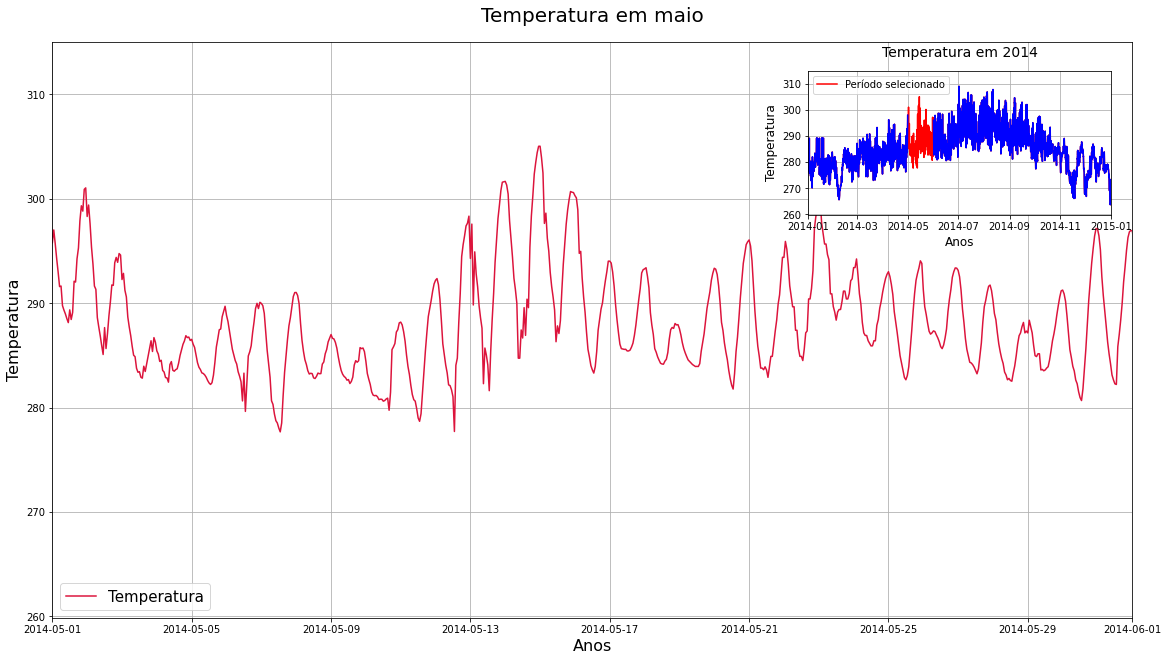

In [9]:
fig = plt.figure(figsize=(15,8))

# Criação dos dois gráficos
eixo = fig.add_axes([0,0,1,1])
eixo2 = fig.add_axes([0.7, 0.7, 0.28, 0.25])

# Gráfico de fundo
eixo.plot(df['data'], df['temperatura'], color = 'crimson')
eixo.legend(['Temperatura'], loc = 'lower left', fontsize = 15)
eixo.grid(True)
eixo.set_ylabel('Temperatura', fontsize = 16)
eixo.set_xlabel('Anos', fontsize = 16)
eixo.set_title('Temperatura em maio', fontsize = 20, pad = 20)
eixo.set_xlim(datetime.datetime(2014,5,1), datetime.datetime(2014,6,1))

# Gráfico da seleção
eixo2.plot(df['data'], df['temperatura'], color = 'r')
eixo2.legend(['Período selecionado'], loc = 'upper left', fontsize = 10)
eixo2.set_xlabel('Anos', fontsize = 12)
eixo2.set_ylabel('Temperatura', fontsize = 12)
eixo2.set_title('Temperatura em 2014', fontsize = 14, pad = 14)
eixo2.set_xlim(datetime.datetime(2014,1,1), datetime.datetime(2015,1,1))
eixo2.grid(True)

# Criando filtros para o gráfico
azul_esquerda = df['data'] < datetime.datetime(2014, 5, 1)
azul_direita = df['data'] > datetime.datetime(2014, 6, 1)

# Aplicação do filtro
eixo2.plot(df[azul_esquerda]['data'], df[azul_esquerda]['temperatura'], color = 'b')
eixo2.plot(df[azul_direita]['data'], df[azul_direita]['temperatura'], color = 'b')

## Módulo 3
### Anotações e diversos gráficos

Text(2013-02-19 21:00:00, 267.37, 'Mínimo')

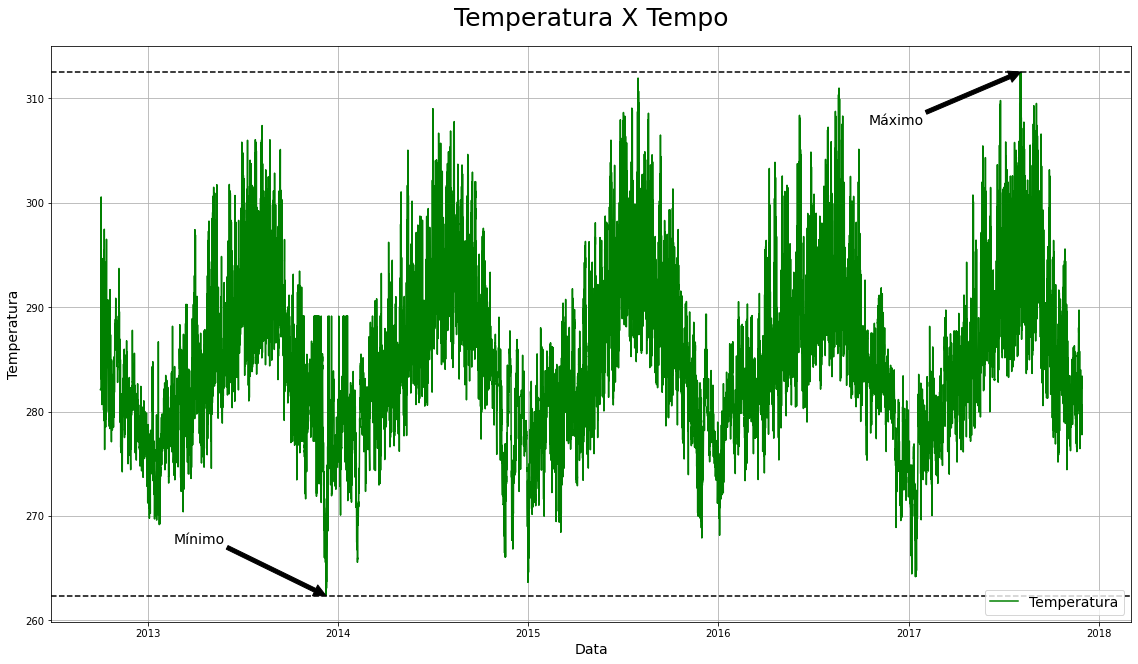

In [10]:
fig = plt.figure(figsize= (15,8))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.plot(df['data'], df['temperatura'], color = 'g')
eixo.set_title('Temperatura X Tempo', fontsize = 25, pad = 20)
eixo.set_xlabel('Data', fontsize = 14)
eixo.set_ylabel('Temperatura', fontsize = 14)
eixo.legend(['Temperatura'], loc = 'lower right', fontsize = 14)
eixo.grid(True)

# Linhas de limite
eixo.axhline(max(df['temperatura']), color = 'black', linestyle = '--')
eixo.axhline(min(df['temperatura']),color = 'black', linestyle = '--')

# Anotação de máx e min: xy1 destino xy2 origem
# Máximo
x1 = df['data'][df['temperatura'].idxmax()]
y1 = max(df['temperatura'])
x2 = df['data'][df['temperatura'].idxmax() - 7000] # subtração na unidade de medida do eixo
y2 = max(df['temperatura']) - 5
eixo.annotate('Máximo', xy = (x1, y1), fontsize = 14, xytext = (x2, y2), arrowprops = dict(facecolor = 'k'))

# Mínimo
x1 = df['data'][df['temperatura'].idxmin()]
y1 = min(df['temperatura'])
x2 = df['data'][df['temperatura'].idxmin() - 7000]
y2 = min(df['temperatura']) + 5
eixo.annotate('Mínimo', xy = (x1, y1), fontsize = 14, xytext = (x2, y2), arrowprops = dict(facecolor = 'k'))

In [11]:
temperatura_semana = df.groupby('dia_da_semana')['temperatura'].mean().round(2)

# Ordenação da lista
nome_dias = ['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado']
temperatura_semana = temperatura_semana[nome_dias]

temperatura_semana

dia_da_semana
Domingo    285.01
Segunda    284.99
Terça      284.89
Quarta     285.00
Quinta     285.00
Sexta      285.06
Sábado     285.00
Name: temperatura, dtype: float64

[Text(0, 0, 'Domingo'),
 Text(1, 0, 'Segunda'),
 Text(2, 0, 'Terça'),
 Text(3, 0, 'Quarta'),
 Text(4, 0, 'Quinta'),
 Text(5, 0, 'Sexta'),
 Text(6, 0, 'Sábado')]

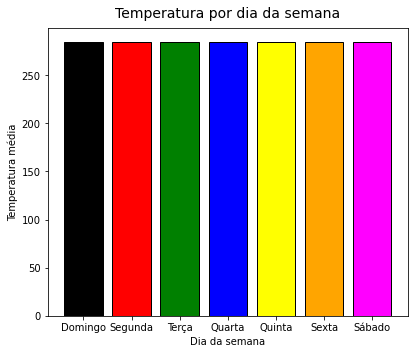

In [12]:
fig = plt.figure(figsize = (5,4))
eixo = fig.add_axes([0, 0, 1, 1])
indice = range(len(temperatura_semana))
cores = ['black', 'red', 'green', 'blue', 'yellow', 'orange', 'magenta']

eixo.bar(indice, temperatura_semana, color = cores, edgecolor = 'black')
eixo.set_title('Temperatura por dia da semana', fontsize = 14, pad = 10)
eixo.set_xlabel('Dia da semana', fontsize = 10)
eixo.set_ylabel('Temperatura média', fontsize = 10)
eixo.set_xticks(indice)
eixo.set_xticklabels(nome_dias)

Text(0.5, 1.0, 'Temperatura por dia da semana')

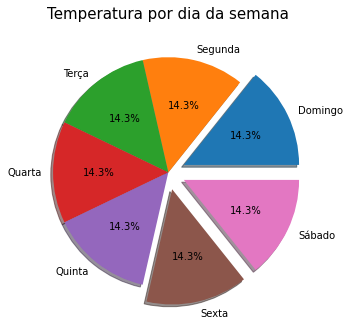

In [13]:
# Gráfico de pizza
fig = plt.figure(figsize = (5,4))
eixo = fig.add_axes([0, 0, 1, 1])

# Destaque
explodir = [0.15, 0 ,0 , 0, 0, 0.15, 0.15]

eixo.pie(temperatura_semana, labels = temperatura_semana.index, autopct = '%0.1f%%', explode = explodir, shadow = True)
eixo.set_title('Temperatura por dia da semana', fontsize = 15, pad = 10)

## Módulo 4
### Visualizando dados diferentes

In [14]:
df = pd.read_csv('iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   comprimento_sépala  150 non-null    float64
 1   largura_sépala      150 non-null    float64
 2   comprimento_pétala  150 non-null    float64
 3   largura_pétala      150 non-null    float64
 4   espécie             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


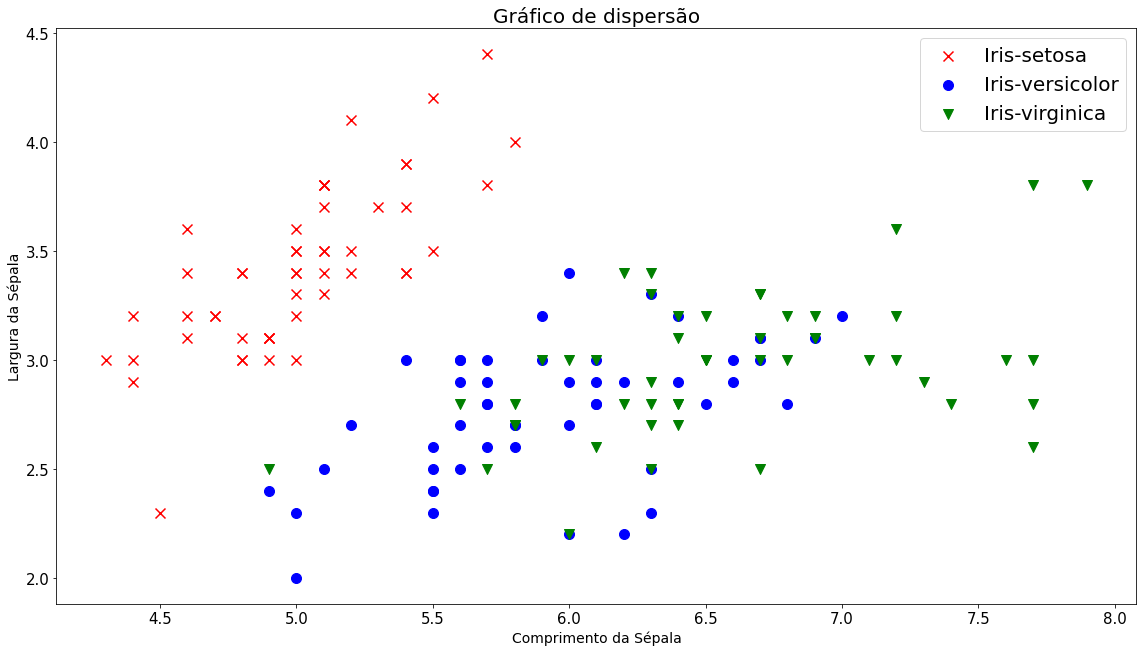

In [15]:
# Scatterplot
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0, 0, 1, 1])

# Dicionários para os loops
cores = {'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}
marcadores  = {'Iris-setosa': 'x', 'Iris-versicolor': 'o', 'Iris-virginica': 'v'}

# Loop de separação da espécies
for especie in df['espécie'].unique():
    temp = df[df['espécie'] == especie]
    eixo.scatter(temp['comprimento_sépala'], temp['largura_sépala'],
                 color = cores[especie], marker = marcadores[especie], s = 100)

eixo.set_title('Gráfico de dispersão', fontsize = 20)
eixo.set_xlabel('Comprimento da Sépala', fontsize = 14)
eixo.set_ylabel('Largura da Sépala', fontsize= 14)
eixo.tick_params(labelsize = 15)
eixo.legend(cores, fontsize = 20)

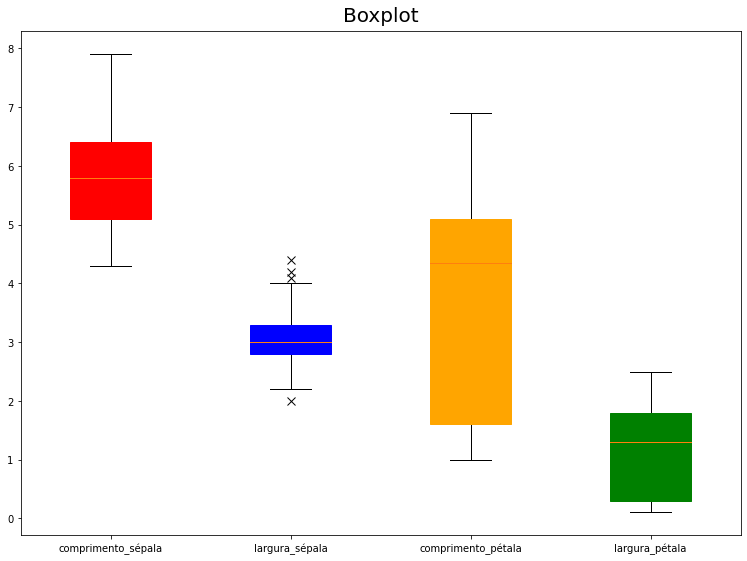

In [16]:
# Boxplot
fig = plt.figure(figsize = (10,7))
eixo = fig.add_axes([0, 0, 1, 1])

# Vetor de cores
cores = ['red','blue','orange', 'green']

# Gráfico
caixas = eixo.boxplot(df.drop('espécie', axis = 1).values, patch_artist = True)
eixo.set_title('Boxplot', fontsize = 20, pad = 10)
eixo.set_xticklabels(df.drop('espécie', axis = 1).columns)

# Loop de cores
for caixa, cor in zip(caixas['boxes'], cores):
    caixa.set(color = cor)

# Mudança de outliers
for outlier in caixas['fliers']:
    outlier.set(marker = 'x', markersize = 8)

In [ ]:
# Histogramas
fig = plt.figure(figsize = (5,4))